# Übung: Ensemble Learning

In diesem Notebook werden wir verschiedene Formen des "Ensemble Learning" einsetzen und einen einfachen Bagging-Algorithmus selbst implementieren.

Vorab initialisieren wir die Zufallsgeneratoren um vergleichbare Ergebnisse zu erhalten:

In [1]:
import numpy as np
import random
np.random.seed(0)
random.seed(0)

### Daten laden

Für diese Übung verwenden wir den [Wein-Datensatz](https://archive.ics.uci.edu/ml/datasets/wine), welcher ebenfalls ein bekannter Datensatz in der ML-Welt ist.
Die offizielle Beschreibung lautet:
```
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
```
Anhand dieser Merkmale soll die Qualität (Spalte `quality`) des Weins vorhergesagt werden. 

In [2]:
import pandas as pd
df = pd.read_csv("../data/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Bevor wir loslegen, schauen wir uns die Verteilung des Labels an:

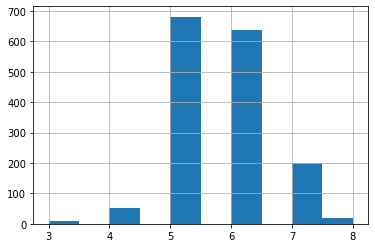

In [3]:
df['quality'].hist()

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Aufgabe 1: Decision Tree, Random Forest, GBT
Trainieren Sie die folgenden Modelle und ermitteln Sie die Accuarcy auf den Testdaten. Geben Sie dabei jeweils den Parameter `random_state=0` bei der Erstellung des Modells and und beschränken Sie die maximale Baumtiefe auf `max_depth=3`.
- Einfacher Entscheidungsbaum (`DecisionTreeClassifier`)
- Random Forest (`RandomForestClassifier`)
- GBT (`GradientBoostingClassifier`)

Hinweis: Für diese Modelle müssen wir die Daten nicht skalieren und kein One-hot-encoding durchführen.

In [5]:
from sklearn.tree import DecisionTreeClassifier
clfTre = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=3)
clfTre.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [6]:
from sklearn.metrics import accuracy_score
predictions = clfTre.predict(X_test)
accuracy_score(y_test, predictions)

0.575

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, max_depth=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.659375

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0, max_depth=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.6875

### Aufgabe 2: GBT Tuning
Das `GradientBoostingClassifier`-Modell hat als wichtigste Hyperparameter die Anzahl der Bäume die trainiert werden (`n_estimators`) und die maximale Baumtiefe (`max_depth`). Hinweis: Weitere Parameter findet man in der [Dokumentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

1. Führen Sie eine Cross-Validierung für diese Hyperparameter über die folgenden Werte durch:
    - `n_estimators` $\in [60, 80, 100, 120, 140]$ und
    - `max_depth` $\in [2, 3, 4, 5]$.

Nehmen Sie [dieses Code-Beispiel](https://chrisalbon.com/machine_learning/model_evaluation/cross_validation_parameter_tuning_grid_search/) als Vorlage. Hinweis: Der `import`-Befehl für `GridSearchCV` ist im Beispiel out-dated und lautet richtig: `from sklearn.model_selection import GridSearchCV`.
2. Welches sind die besten Werte für `n_estimators` und `max_depth`?
3. Trainieren Sie einen neuen GBT mit diesen Parametern und machen Sie eine Vorhersage auf den Testdaten. Vergleichen Sie die Ergebnisse mit Aufgabe 1.

In [9]:
parameter_candidates = [{'max_depth': [2, 3, 4, 5], 'n_estimators': [60,80,100,120,140]}]

In [10]:
from sklearn.model_selection import GridSearchCV

gbt = GradientBoostingClassifier(random_state=0)
grid_clf = GridSearchCV(estimator=gbt, param_grid=parameter_candidates, n_jobs=-1)
grid_clf.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 4, 5],
                          'n_estimators': [60, 80, 100, 120, 140]}])

In [11]:
print('Best n_estimators:', grid_clf.best_estimator_.n_estimators) 
print('Best max_depth:', grid_clf.best_estimator_.max_depth)

Best n_estimators: 100
Best max_depth: 5


In [12]:
clf = GradientBoostingClassifier(random_state=0, max_depth=5, n_estimators=100)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.703125

Hinweis: Es hat sich gezeigt, dass mit unterschiedlichen Library-Versionen auch unterschiedliche Ergebnisse für `n_estimators` und `max_depth` gefunden werden.